# 『5과목』 AI와 딥러닝

## Set Up

In [8]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [2]:
import tensorflow as tf

print(tf.executing_eagerly())

True


In [3]:
# import tensorflow as tf
# tf.config.run_functions_eagerly(True)

```
if False :
    
import tensorflow as tf
tf.config.run_functions_eagerly(True)

재시작 후 다시 실행

## RNN 실습

In [4]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(777)

# Characters and their corresponding indices
idx2char = ['h', 'e', 'l', 'o']
char2idx = {c: i for i, c in enumerate(idx2char)}

# One-hot encoding for each character
x_data = [[char2idx[c] for c in 'hell']]
x_one_hot = np.array([[[1, 0, 0, 0],  # h
                       [0, 1, 0, 0],  # e
                       [0, 0, 1, 0],  # l
                       [0, 0, 1, 0]]])  # l

y_data = [[char2idx[c] for c in 'ello']]

num_classes = 4  # Number of unique characters (h, e, l, o)
input_dim = 4  # One-hot size
hidden_size = 4  # Output size of the LSTM
batch_size = 1  # One sequence at a time
sequence_length = 4  # Length of the input sequence
learning_rate = 0.1

# Define the model
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.lstm = tf.keras.layers.LSTM(hidden_size, return_sequences=True, stateful=False, input_shape=(sequence_length, input_dim))
        self.dense = tf.keras.layers.Dense(num_classes)

    def call(self, x):
        x = self.lstm(x)
        x = self.dense(x)
        return x

model = MyModel()

# Define the loss and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

# Training step
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_object(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(targets, predictions)

# Prepare the data
X = tf.constant(x_one_hot, dtype=tf.float32)
Y = tf.constant(y_data, dtype=tf.int32)

# Training the model
EPOCHS = 50

for epoch in range(EPOCHS):
    train_step(X, Y)

    template = 'Epoch {}, Loss: {}, Accuracy: {}'
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result() * 100))

    train_loss.reset_state()
    train_accuracy.reset_state()

# Prediction
predictions = model(X)
predicted_ids = tf.argmax(predictions, axis=2).numpy()

# Print predictions
result_str = [idx2char[c] for c in np.squeeze(predicted_ids)]
print("Prediction str: ", ''.join(result_str))


c:\DEV\envs\py3_10_tf\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1, Loss: 1.386613130569458, Accuracy: 0.0
Epoch 2, Loss: 1.2563974857330322, Accuracy: 50.0
Epoch 3, Loss: 1.1422088146209717, Accuracy: 100.0
Epoch 4, Loss: 1.027370572090149, Accuracy: 75.0
Epoch 5, Loss: 0.9176095128059387, Accuracy: 50.0
Epoch 6, Loss: 0.8184590339660645, Accuracy: 75.0
Epoch 7, Loss: 0.7308908700942993, Accuracy: 75.0
Epoch 8, Loss: 0.6447954177856445, Accuracy: 75.0
Epoch 9, Loss: 0.5494548678398132, Accuracy: 75.0
Epoch 10, Loss: 0.45080137252807617, Accuracy: 100.0
Epoch 11, Loss: 0.3626140356063843, Accuracy: 100.0
Epoch 12, Loss: 0.283269464969635, Accuracy: 100.0
Epoch 13, Loss: 0.20934784412384033, Accuracy: 100.0
Epoch 14, Loss: 0.15492215752601624, Accuracy: 100.0
Epoch 15, Loss: 0.11667323112487793, Accuracy: 100.0
Epoch 16, Loss: 0.08430643379688263, Accuracy: 100.0
Epoch 17, Loss: 0.05984513834118843, Accuracy: 100.0
Epoch 18, Loss: 0.04343891888856888, Accuracy: 100.0
Epoch 19, Loss: 0.03230142593383789, Accuracy: 100.0
Epoch 20, Loss: 0.0242564

## LSTM

In [5]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()
tf.set_random_seed(777)  # 재현 가능성

sample = "I am a boy. You're a girl."
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> index

# 하이퍼 파라미터
dic_size = len(char2idx)  # RNN 입력 크기 (원-핫 크기)
hidden_size = len(char2idx)  # RNN 출력 크기
num_classes = len(char2idx)  # 최종 출력 크기 (RNN 또는 소프트맥스 등)
batch_size = 1  # 하나의 샘플 데이터, 하나의 배치
sequence_length = len(sample) - 1  # LSTM 롤링 수 (유닛 수)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # 문자 -> 인덱스
x_data = [sample_idx[:-1]]  # X 데이터 샘플 (0 ~ n-1) 예: hell
y_data = [sample_idx[1:]]   # Y 라벨 샘플 (1 ~ n) 예: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X 데이터
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y 라벨

x_one_hot = tf.one_hot(X, num_classes)  # 원-핫 인코딩: 1 -> 0 1 0 0 0 0 0 0 0 0

# LSTM 레이어
lstm = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
outputs = lstm(x_one_hot)

# FC 레이어
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.keras.layers.Dense(num_classes, activation=None)(X_for_fc)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

# y_data를 텐서로 변환
y_data_tensor = tf.convert_to_tensor(y_data, dtype=tf.int32)

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
    y_data_tensor, outputs, from_logits=True)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # 딕셔너리를 사용해 문자 출력
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "손실:", l, "예측:", ''.join(result_str))


Instructions for updating:
non-resource variables are not supported in the long term

0 손실: 2.778284 예측:                          
1 손실: 2.5291853 예측:         o   oorr         
2 손실: 2.241649 예측:       ooorrrorrrr    orrr
3 손실: 2.1139817 예측:        ooo ooorr      oo 
4 손실: 1.8897884 예측:     a ooo   orr     aoll 
5 손실: 1.5834327 예측:  a  a boy  aou'r  a aill.
6 손실: 1.3457412 예측:  a  a aoy  aou'r  a aill.
7 손실: 1.1317477 예측:  a  a aoy. aou''e a airl.
8 손실: 0.87913597 예측:  a  a goy. You''e a girl.
9 손실: 0.68917495 예측:  a  a goy. You're a girl.
10 손실: 0.5396069 예측:  a  a boy. You're a girl.
11 손실: 0.40244183 예측:  a  a boy. You're a girl.
12 손실: 0.3064622 예측:  a  a boy. You're a girl.
13 손실: 0.23879704 예측:  a  a boy. You're a girl.
14 손실: 0.18625866 예측:  a  a boy. You're a girl.
15 손실: 0.14693813 예측:  am a boy. You're a girl.
16 손실: 0.11290574 예측:  am a boy. You're a girl.
17 손실: 0.090302594 예측:  am a boy. You're a girl.
18 손실: 0.0720612 예측:  am a boy. You're a girl.
19 손실: 0.052752405 예측: 

## 텐서플로에서 제공하는 RNN 미사용

In [6]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

# input data (mini-batch)
# t = 0
X0_batch = np.array([[0, 1, 2],  # sample 0
                     [3, 4, 5],  # sample 1
                     [6, 7, 8],  # sample 2
                     [9, 0, 1]]) # sample 3
# t = 1
X1_batch = np.array([[9, 8, 7],
                     [3, 4, 5],
                     [6, 5, 4],
                     [3, 2, 1]])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val))

Y0_val:(4, 5)
[[-0.10894947  0.9971884  -0.43115816 -0.9997683   0.8438099 ]
 [ 0.7500705   1.          0.5545411  -1.         -0.51446307]
 [ 0.9677533   1.          0.9367884  -1.         -0.9827364 ]
 [ 0.99995834  0.9999893   0.94358313 -1.         -0.977834  ]]
Y1_val:(4, 5)
[[ 0.8869786   1.          0.999982   -1.         -0.9994521 ]
 [-0.49885938  1.          0.99952835 -1.         -0.9014005 ]
 [ 0.7662765   1.          0.99999684 -1.         -0.999998  ]
 [-0.1072882   0.99999183  0.9999748  -1.         -0.9999314 ]]


## RNN 좀 더 살펴보기

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [1]:
import tensorflow as tf

print(tf.executing_eagerly())

True


In [2]:
# import tensorflow as tf
# tf.config.run_functions_eagerly(True)

```
if False :
    
import tensorflow as tf
tf.config.run_functions_eagerly(True)

재시작 후 다시 실행

### 텐서플로에서 제공하는 RNN 미사용

In [3]:
import tensorflow as tf
import numpy as np

n_inputs = 3
n_neurons = 5

# Define the model
class SimpleRNNCell(tf.keras.layers.Layer):
    def __init__(self, n_neurons):
        super(SimpleRNNCell, self).__init__()
        self.n_neurons = n_neurons

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(n_inputs, self.n_neurons),
                                  initializer='random_normal',
                                  trainable=True)
        self.Wy = self.add_weight(shape=(self.n_neurons, self.n_neurons),
                                  initializer='random_normal',
                                  trainable=True)
        self.b = self.add_weight(shape=(1, self.n_neurons),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, states):
        prev_output = states[0]
        output = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(prev_output, self.Wy) + self.b)
        return output, [output]

# Initialize the RNN cell
cell = SimpleRNNCell(n_neurons)

# Define the input data (mini-batch)
# t = 0
X0_batch = np.array([[0, 1, 2],  # sample 0
                     [3, 4, 5],  # sample 1
                     [6, 7, 8],  # sample 2
                     [9, 0, 1]], dtype=np.float32) # sample 3
# t = 1
X1_batch = np.array([[9, 8, 7],
                     [3, 4, 5],
                     [6, 5, 4],
                     [3, 2, 1]], dtype=np.float32)

# Run the RNN cell step by step
@tf.function
def run_rnn(X0, X1):
    Y0, [state] = cell(X0, [tf.zeros((X0.shape[0], n_neurons), dtype=tf.float32)])
    Y1, _ = cell(X1, [state])
    return Y0, Y1

# Execute the function
Y0_val, Y1_val = run_rnn(X0_batch, X1_batch)

print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val.numpy()))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val.numpy()))


Y0_val:(4, 5)
[[-0.12148565  0.06639175  0.03867331 -0.08433867  0.22041944]
 [-0.29991987  0.20010701  0.09297263 -0.37455258  0.49250427]
 [-0.4595767   0.32676166  0.14672454 -0.6061906   0.6934782 ]
 [ 0.3848348   0.11088704  0.17104925 -0.40978274 -0.251717  ]]
Y1_val:(4, 5)
[[-0.40898672  0.3368072   0.1369314  -0.68792856  0.6285961 ]
 [-0.27115613  0.22200303  0.11844832 -0.38723505  0.5286923 ]
 [-0.19364038  0.23990966  0.1050432  -0.5081889   0.44629976]
 [-0.0158764   0.04473954  0.00577913 -0.24469215  0.10638045]]


### 텐서플로에서 제공하는 RNN연산

In [4]:
import tensorflow as tf
import numpy as np

n_inputs = 3
n_neurons = 5

class SimpleRNNCell(tf.keras.layers.Layer):
    def __init__(self, n_neurons):
        super(SimpleRNNCell, self).__init__()
        self.n_neurons = n_neurons

    def build(self, input_shape):
        self.Wx = self.add_weight(shape=(n_inputs, self.n_neurons),
                                  initializer='random_normal',
                                  trainable=True)
        self.Wy = self.add_weight(shape=(self.n_neurons, self.n_neurons),
                                  initializer='random_normal',
                                  trainable=True)
        self.b = self.add_weight(shape=(1, self.n_neurons),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, states):
        prev_output = states[0]
        output = tf.tanh(tf.matmul(inputs, self.Wx) + tf.matmul(prev_output, self.Wy) + self.b)
        return output, [output]

cell = SimpleRNNCell(n_neurons)

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]], dtype=np.float32)
X1_batch = np.array([[9, 8, 7], [3, 4, 5], [6, 5, 4], [3, 2, 1]], dtype=np.float32)

@tf.function
def run_rnn(X0, X1):
    Y0, [state] = cell(X0, [tf.zeros((X0.shape[0], n_neurons), dtype=tf.float32)])
    Y1, _ = cell(X1, [state])
    return Y0, Y1

Y0_val, Y1_val = run_rnn(X0_batch, X1_batch)

print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val.numpy()))
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val.numpy()))

Y0_val:(4, 5)
[[ 0.09012254  0.04742132 -0.08465774  0.12223437 -0.07667086]
 [ 0.00321649  0.21669188 -0.19354245  0.60396105  0.05128728]
 [-0.08373816  0.37386435 -0.29785934  0.85538065  0.17758335]
 [-0.49357918  0.41567558 -0.18809658  0.7648396   0.64574236]]
Y1_val:(4, 5)
[[-0.35078722  0.43459466 -0.24161334  0.9216671   0.42462292]
 [-0.06029224  0.1603758  -0.17971846  0.5855349   0.03869048]
 [-0.34765717  0.20403321 -0.11649353  0.75574857  0.30881044]
 [-0.26485422  0.00938421 -0.00767065  0.3903818   0.20959742]]


### BPTT (BackPropagation Through Time)

### RNN for Time Series

In [5]:
import tensorflow as tf
import numpy as np

################
# Layer Params #
################
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x.astype(np.float32).reshape(-1, 28*28) / 255.0  # (784,)
test_x = test_x.astype(np.float32).reshape(-1, 28*28) / 255.0
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)
valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]
test_x = test_x.reshape([-1, n_steps, n_inputs])
valid_x = valid_x.reshape([-1, n_steps, n_inputs])

print('train_x.shape :', train_x.shape)
print('valid_x.shape :', valid_x.shape)
print('test_x.shape :', test_x.shape)

# Mini-batch
def shuffle_batch(features, labels, batch_size):
    rnd_idx = np.random.permutation(len(features))
    n_batches = len(features) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        batch_x, batch_y = features[batch_idx], labels[batch_idx]
        yield batch_x, batch_y

# Define the model using tf.keras
class RNNModel(tf.keras.Model):
    def __init__(self, n_neurons, n_outputs):
        super(RNNModel, self).__init__()
        self.rnn = tf.keras.layers.SimpleRNN(n_neurons, return_sequences=False)
        self.dense = tf.keras.layers.Dense(n_outputs)

    def call(self, inputs):
        rnn_output = self.rnn(inputs)
        logits = self.dense(rnn_output)
        return logits

model = RNNModel(n_neurons, n_outputs)

# Define loss and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define metrics
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
valid_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Training step
@tf.function
def train_step(batch_x, batch_y):
    with tf.GradientTape() as tape:
        logits = model(batch_x, training=True)
        loss = loss_fn(batch_y, logits)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_accuracy.update_state(batch_y, logits)
    return loss

# Validation step
@tf.function
def valid_step(valid_x, valid_y):
    logits = model(valid_x, training=False)
    valid_accuracy.update_state(valid_y, logits)

# Training loop
n_epochs = 5
batch_size = 150

for epoch in range(n_epochs):
    for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
        batch_x = batch_x.reshape([-1, n_steps, n_inputs])
        train_loss = train_step(batch_x, batch_y)
    for valid_x_batch, valid_y_batch in shuffle_batch(valid_x, valid_y, batch_size):
        valid_x_batch = valid_x_batch.reshape([-1, n_steps, n_inputs])
        valid_step(valid_x_batch, valid_y_batch)
    print(f'Epoch {epoch+1}, '
          f'Train Loss: {train_loss.numpy():.4f}, '
          f'Train Accuracy: {train_accuracy.result().numpy():.4f}, '
          f'Validation Accuracy: {valid_accuracy.result().numpy():.4f}')
    train_accuracy.reset_state()
    valid_accuracy.reset_state()


train_x.shape : (55000, 784)
valid_x.shape : (5000, 28, 28)
test_x.shape : (10000, 28, 28)
Epoch 1, Train Loss: 0.1720, Train Accuracy: 0.8673, Validation Accuracy: 0.9458
Epoch 2, Train Loss: 0.1681, Train Accuracy: 0.9432, Validation Accuracy: 0.9548
Epoch 3, Train Loss: 0.1196, Train Accuracy: 0.9542, Validation Accuracy: 0.9574
Epoch 4, Train Loss: 0.1716, Train Accuracy: 0.9616, Validation Accuracy: 0.9516
Epoch 5, Train Loss: 0.1203, Train Accuracy: 0.9668, Validation Accuracy: 0.9668


In [6]:
import tensorflow as tf
import numpy as np

################
# Layer Params #
################
n_steps = 20
n_neurons = 100
n_inputs = 1
n_outputs = 1

# 시계열 함수 정의
def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t * 5)

# 다음 배치 생성 함수
def next_batch(batch_size, n_steps):
    t_min, t_max = 0, 30
    resolution = 0.1
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

# 모델 정의
class RNNModel(tf.keras.Model):
    def __init__(self, n_neurons, n_outputs):
        super(RNNModel, self).__init__()
        self.rnn = tf.keras.layers.SimpleRNN(n_neurons, activation='relu', return_sequences=True)
        self.dense = tf.keras.layers.Dense(n_outputs)

    def call(self, inputs):
        rnn_output = self.rnn(inputs)
        dense_output = self.dense(rnn_output)
        return dense_output

model = RNNModel(n_neurons, n_outputs)

# 손실 함수 및 옵티마이저 정의
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# 학습 단계 함수 정의
@tf.function
def train_step(batch_x, batch_y):
    with tf.GradientTape() as tape:
        predictions = model(batch_x, training=True)
        loss = loss_fn(batch_y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# 학습 루프
n_iterations = 600
batch_size = 50

for iteration in range(n_iterations):
    batch_x, batch_y = next_batch(batch_size, n_steps)
    loss = train_step(batch_x, batch_y)
    if iteration % 100 == 0:
        print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss.numpy()))

# 새로운 데이터 예측하기
t_instance = np.linspace(12.2, 12.2 + 0.1 * (n_steps + 1), n_steps + 1)
X_new = time_series(t_instance[:-1].reshape(-1, n_steps, n_inputs))
y_pred = model.predict(X_new)

print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))


step: 000, MSE: 21.9761
step: 100, MSE: 0.4538
step: 200, MSE: 0.2451
step: 300, MSE: 0.0950
step: 400, MSE: 0.0715
step: 500, MSE: 0.0666
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
y_pred:(1, 20, 1)
[[[-3.3249848]
  [-2.6135507]
  [-1.1412055]
  [ 0.6063617]
  [ 2.0431118]
  [ 3.0815928]
  [ 3.5970461]
  [ 3.3986146]
  [ 2.7948463]
  [ 2.0895548]
  [ 1.6225578]
  [ 1.5106395]
  [ 1.8657867]
  [ 2.7450225]
  [ 3.9386299]
  [ 5.133034 ]
  [ 6.029716 ]
  [ 6.6354256]
  [ 6.723065 ]
  [ 6.219741 ]]]


C:\Users\k8s\AppData\Local\Temp\ipykernel_8916\3867554964.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w*" (-> color='w'). The keyword argument will take precedence.
  plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')


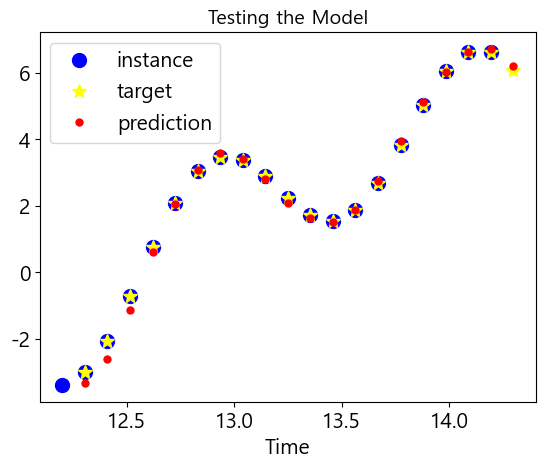

In [9]:
plt.title("Testing the Model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## 가상의 시계열 데이터 만들기

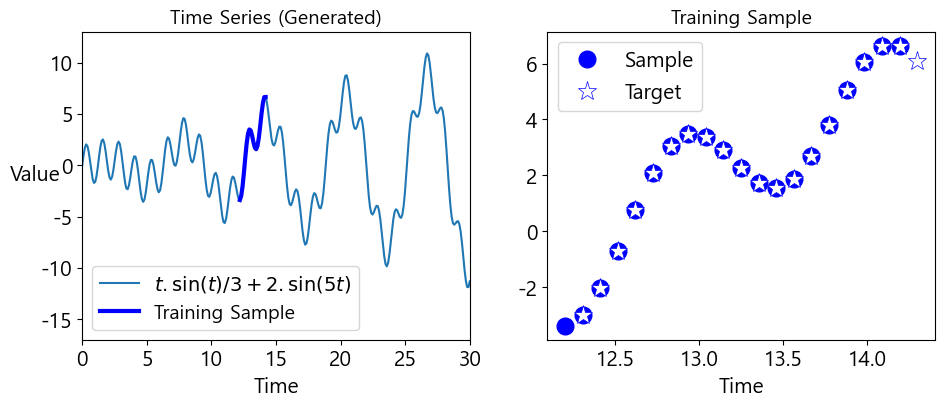

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 범위와 해상도 설정
t_min, t_max = 0, 30
resolution = 0.1

# 시계열 함수 정의
def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t * 5)

# 다음 배치 생성 함수
def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

# 시간 시퀀스 생성
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

# 학습 샘플 인스턴스
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

# 시각화
plt.figure(figsize=(11, 4))

# 전체 시계열 데이터 시각화
plt.subplot(121)
plt.title("Time Series (Generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="Training Sample")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value", rotation=0)

# 학습 샘플 시각화
plt.subplot(122)
plt.title("Training Sample", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="Sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]),
         "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14, label="Target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()


## OutputProjectionWrapper를 사용한 RNN 모델링


In [11]:
import tensorflow as tf
import numpy as np

# 시계열 함수 정의
def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t * 5)

# 다음 배치 생성 함수
def next_batch(batch_size, n_steps):
    t_min, t_max = 0, 30
    resolution = 0.1
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

################
# Layer Params #
################
n_steps = 20
n_neurons = 100
n_inputs = 1
n_outputs = 1

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(n_neurons, activation='relu', return_sequences=True, input_shape=[n_steps, n_inputs]),
    tf.keras.layers.Dense(n_outputs)
])

# 손실 함수 및 옵티마이저 정의
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# 학습 루프
n_iterations = 600
batch_size = 50

for iteration in range(n_iterations):
    batch_x, batch_y = next_batch(batch_size, n_steps)
    model.train_on_batch(batch_x, batch_y)
    if iteration % 100 == 0:
        loss = model.evaluate(batch_x, batch_y, verbose=0)
        print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))

# 새로운 데이터 예측하기
t_instance = np.linspace(12.2, 12.2 + 0.1 * (n_steps + 1), n_steps + 1)
X_new = time_series(t_instance[:-1].reshape(-1, n_steps, n_inputs))
y_pred = model.predict(X_new)

print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))


c:\DEV\envs\py3_10_tf\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


step: 000, MSE: 13.2484
step: 100, MSE: 0.5794
step: 200, MSE: 0.1204
step: 300, MSE: 0.0742
step: 400, MSE: 0.0662
step: 500, MSE: 0.0544
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
y_pred:(1, 20, 1)
[[[-3.4857135 ]
  [-2.4741142 ]
  [-1.1276451 ]
  [ 0.64611644]
  [ 2.1435404 ]
  [ 3.055186  ]
  [ 3.4387968 ]
  [ 3.3269138 ]
  [ 2.8791952 ]
  [ 2.2140698 ]
  [ 1.6911279 ]
  [ 1.4294382 ]
  [ 1.8068477 ]
  [ 2.6916142 ]
  [ 3.8611376 ]
  [ 5.1054893 ]
  [ 6.101262  ]
  [ 6.6523867 ]
  [ 6.6210656 ]
  [ 6.073001  ]]]


C:\Users\k8s\AppData\Local\Temp\ipykernel_8916\3867554964.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w*" (-> color='w'). The keyword argument will take precedence.
  plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')


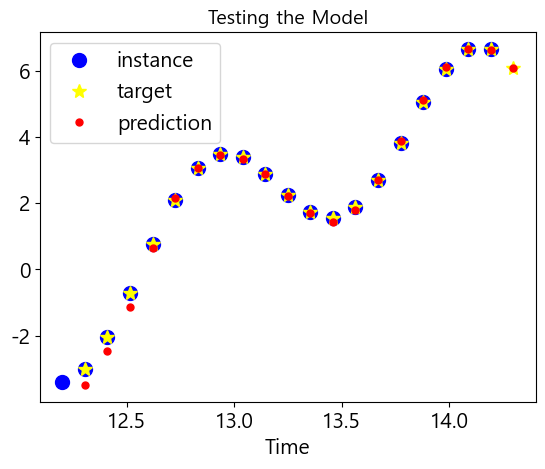

In [12]:
plt.title("Testing the Model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## 심층 RNN

### 텐서플로에서의 Deep RNN

In [13]:
import tensorflow as tf
import numpy as np

################
# Layer Params #
################
n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(n_steps, n_inputs)))

for _ in range(n_layers):
    model.add(tf.keras.layers.SimpleRNN(n_neurons, return_sequences=True))

# 모델 빌드 (가짜 데이터로 한번 빌드해줍니다)
model.build(input_shape=(None, n_steps, n_inputs))

# 모델 요약 출력
model.summary()

# 샘플 데이터 생성
batch_x = np.random.rand(2, n_steps, n_inputs)  # shape: (2, 5, 2)

# 모델 예측
outputs_val = model(batch_x)

print('outputs_val shape:', outputs_val.shape)


c:\DEV\envs\py3_10_tf\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 5, 100)              │          10,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 5, 100)              │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 5, 100)              │          20,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,500 (197.27 KB)

 Trainable params: 50,500 (197.27 KB)

 Non-trainable params: 0 (0.00 B)

outputs_val shape: (2, 5, 100)


### Dropout 적용하기


In [14]:
import tensorflow as tf
import numpy as np

# 시계열 함수 정의
def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t * 5)

# 다음 배치 생성 함수
def next_batch(batch_size, n_steps):
    t_min, t_max = 0, 30
    resolution = 0.1
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

# 하이퍼파라미터 정의
n_inputs = 1
n_outputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
learning_rate = 0.01
train_keep_prob = 0.3
n_iterations = 1500
batch_size = 50

# 모델 정의
inputs = tf.keras.Input(shape=[n_steps, n_inputs])
x = inputs
for _ in range(n_layers):
    x = tf.keras.layers.SimpleRNN(n_neurons, return_sequences=True, dropout=train_keep_prob)(x)
outputs = tf.keras.layers.Dense(n_outputs)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

# 학습 루프
for iteration in range(n_iterations):
    batch_x, batch_y = next_batch(batch_size, n_steps)
    model.train_on_batch(batch_x, batch_y)
    if iteration % 300 == 0:
        loss = model.evaluate(batch_x, batch_y, verbose=0)
        print(f'step: {iteration:03d}, MSE: {loss:.4f}')

# 새로운 데이터 예측하기
t_instance = np.linspace(12.2, 12.2 + 0.1 * (n_steps + 1), n_steps + 1)
X_new = time_series(t_instance[:-1]).reshape(-1, n_steps, n_inputs)
y_pred = model.predict(X_new)

print('y_pred:\n', y_pred)


step: 000, MSE: 17.8411
step: 300, MSE: 1.1253
step: 600, MSE: 1.7158
step: 900, MSE: 1.7287
step: 1200, MSE: 1.8412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
y_pred:
 [[[-2.5953543 ]
  [-1.5752137 ]
  [-0.7855113 ]
  [ 0.36018515]
  [ 1.5079751 ]
  [ 2.151154  ]
  [ 2.2791855 ]
  [ 2.0051823 ]
  [ 1.6649699 ]
  [ 1.3929043 ]
  [ 1.0405588 ]
  [ 1.0893521 ]
  [ 1.537915  ]
  [ 1.8842788 ]
  [ 2.4331925 ]
  [ 3.2920883 ]
  [ 4.2383304 ]
  [ 4.8470397 ]
  [ 4.651232  ]
  [ 4.394106  ]]]


C:\Users\k8s\AppData\Local\Temp\ipykernel_8916\3867554964.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w*" (-> color='w'). The keyword argument will take precedence.
  plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')


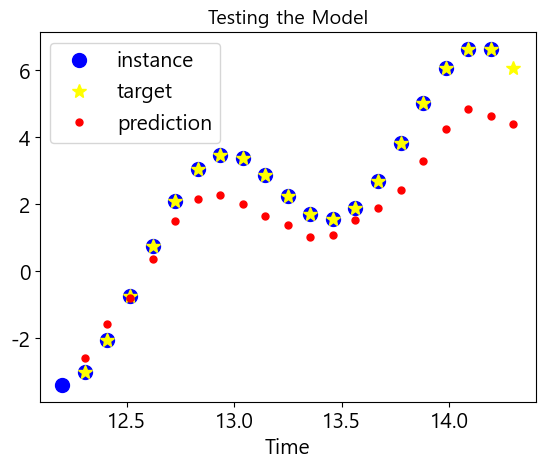

In [15]:
plt.title("Testing the Model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## 텐서플로에서의 LSTM 셀

In [16]:
import tensorflow as tf
import numpy as np

################
# Layer Params #
################
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

# MNIST Data Load
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x.astype(np.float32) / 255.0  # normalize to [0,1]
test_x = test_x.astype(np.float32) / 255.0
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)
valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]
train_x = train_x.reshape([-1, n_steps, n_inputs])
test_x = test_x.reshape([-1, n_steps, n_inputs])
valid_x = valid_x.reshape([-1, n_steps, n_inputs])

print('train_x.shape :', train_x.shape)
print('valid_x.shape :', valid_x.shape)
print('test_x.shape :', test_x.shape)

# Mini-batch
def shuffle_batch(features, labels, batch_size):
    rnd_idx = np.random.permutation(len(features))
    n_batches = len(features) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        batch_x, batch_y = features[batch_idx], labels[batch_idx]
        yield batch_x, batch_y

# LSTM Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(n_steps, n_inputs)))
for _ in range(n_layers):
    model.add(tf.keras.layers.LSTM(n_neurons, return_sequences=True))
model.add(tf.keras.layers.LSTM(n_neurons))
model.add(tf.keras.layers.Dense(n_outputs))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

################
# Train Params #
################
n_epochs = 5
batch_size = 150

# Train the model
for epoch in range(n_epochs):
    for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
        model.train_on_batch(batch_x, batch_y)
    train_loss, train_acc = model.evaluate(train_x, train_y, verbose=0)
    valid_loss, valid_acc = model.evaluate(valid_x, valid_y, verbose=0)
    print(f'epoch: {epoch+1:03d}, train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}, valid_loss: {valid_loss:.4f}, valid_acc: {valid_acc:.4f}')

# 평가
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print(f'test_loss: {test_loss:.4f}, test_acc: {test_acc:.4f}')


train_x.shape : (55000, 28, 28)
valid_x.shape : (5000, 28, 28)
test_x.shape : (10000, 28, 28)
epoch: 001, train_loss: 0.1556, train_acc: 0.9520, valid_loss: 0.1380, valid_acc: 0.9590
epoch: 002, train_loss: 0.0850, train_acc: 0.9738, valid_loss: 0.0798, valid_acc: 0.9746
epoch: 003, train_loss: 0.0645, train_acc: 0.9791, valid_loss: 0.0666, valid_acc: 0.9806
epoch: 004, train_loss: 0.0523, train_acc: 0.9843, valid_loss: 0.0558, valid_acc: 0.9850
epoch: 005, train_loss: 0.0365, train_acc: 0.9894, valid_loss: 0.0498, valid_acc: 0.9864
test_loss: 0.0497, test_acc: 0.9852


## GRU Cell

In [17]:
import tensorflow as tf
import numpy as np

################
# Layer Params #
################
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

# MNIST Data Load
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x.astype(np.float32) / 255.0  # normalize to [0,1]
test_x = test_x.astype(np.float32) / 255.0
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)
valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]
train_x = train_x.reshape([-1, n_steps, n_inputs])
test_x = test_x.reshape([-1, n_steps, n_inputs])
valid_x = valid_x.reshape([-1, n_steps, n_inputs])

print('train_x.shape :', train_x.shape)
print('valid_x.shape :', valid_x.shape)
print('test_x.shape :', test_x.shape)

# Mini-batch
def shuffle_batch(features, labels, batch_size):
    rnd_idx = np.random.permutation(len(features))
    n_batches = len(features) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        batch_x, batch_y = features[batch_idx], labels[batch_idx]
        yield batch_x, batch_y

# GRU Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(n_steps, n_inputs)))
for _ in range(n_layers):
    model.add(tf.keras.layers.GRU(n_neurons, return_sequences=True))
model.add(tf.keras.layers.GRU(n_neurons))
model.add(tf.keras.layers.Dense(n_outputs))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

################
# Train Params #
################
n_epochs = 5
batch_size = 150

# Train the model
for epoch in range(n_epochs):
    for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
        model.train_on_batch(batch_x, batch_y)
    train_loss, train_acc = model.evaluate(train_x, train_y, verbose=0)
    valid_loss, valid_acc = model.evaluate(valid_x, valid_y, verbose=0)
    print(f'epoch: {epoch+1:03d}, train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}, valid_loss: {valid_loss:.4f}, valid_acc: {valid_acc:.4f}')

# 평가
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print(f'test_loss: {test_loss:.4f}, test_acc: {test_acc:.4f}')


train_x.shape : (55000, 28, 28)
valid_x.shape : (5000, 28, 28)
test_x.shape : (10000, 28, 28)
epoch: 001, train_loss: 0.1437, train_acc: 0.9553, valid_loss: 0.1283, valid_acc: 0.9608
epoch: 002, train_loss: 0.0826, train_acc: 0.9739, valid_loss: 0.0793, valid_acc: 0.9758
epoch: 003, train_loss: 0.0524, train_acc: 0.9825, valid_loss: 0.0649, valid_acc: 0.9802
epoch: 004, train_loss: 0.0326, train_acc: 0.9899, valid_loss: 0.0443, valid_acc: 0.9872
epoch: 005, train_loss: 0.0265, train_acc: 0.9917, valid_loss: 0.0420, valid_acc: 0.9872
test_loss: 0.0379, test_acc: 0.9879
